<a href="https://colab.research.google.com/github/Simonolsson98/AdventOfCode2020/blob/main/HW3_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TDA233 / DIT381: Home Assignment 3 (20 points)** <br />
**Goal: Image classification using fully-connected and convolutional neural networks, and time series prediction using recurrent neural networks** <br />
                  **Grader: Hampus Gummesson Svensson** <br />
                    **Due Date: 5/3** <br />
                  **Submitted by: Name, Personal no., email** <br />
                  **Torbjörn Nur Olsson, 19880123-4934, torbjornolssonnur@gmail.com** <br />
                  **Simon Olsson, 19980501-4553, simol@student.chalmers.se** <br />
                  
---

# Read this before starting

## General guielines 
*   Your name, personal number and email address should be specified above.
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All the answers for theoretical questions and text-based practical questions must be filled in the cells created for you with "Your answer here:" below each question, but feel free to add more cells if needed.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   All tables and other additional information should be included in this notebook.
*   Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run on Google colab.
* **Submit your solutions as notebook file (`.ipynb`) and in HTML format (`.html`).** To export this notebook to HTML format click `File` $\rightarrow$ `Download as` $\rightarrow$ `HTML`.

> **Note:** Training neural networks is computationally demanding and may take  time if you run it on your laptop. Running the code in Google Colab will likely be faster and you can even get access to a GPU.

> **Note:** To enable GPU hardware accelartion in Google Colab, click the `Change runtime type` field in the `runtime` drop-down menu, then choose `GPU` under hardware acceleration.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hampusgs/machine_learning/blob/main/2021/HW3_2021.ipynb)


## Required software

For this assignment you will need to install the following Python packages:

- `pytorch`: Installation instructions can be found on the [pytorch homepage](https://pytorch.org/get-started/locally/) (make sure that you install it together with CUDA to enable GPU acceleration)
- `torchvision`: Typically installed with pytorch
- `numpy`: The fundamental package for scientific computing with Python (so fundamental that there is a [Nature review](https://www.nature.com/articles/s41586-020-2649-2) on it) 
- `pandas`: Data analysis and manipulation tool
- `matplotlib`: Visualization with Python
- `pillow`: Image library to handle PIL images
- `catsndogs` and `camels`: The data sets we will be working with. To install them, run: `pip install catsndogs camels`

> **Note:** In Google Colab you can install packages using   `!pip  <package_name>`

> **Note:** In Google Colab several of these packages are preinstalled but it is a good habit to check if all required packages are installed beforehand and the installed versions of packages. Use `!pip list` to list packages installed by pip on Google Colab.

# Assignment 3
# Theoretical exercises

## [Exercise 1: Backpropagation by hand, 2 point]

Consider the simple feed-forward neural network depicted in the figure below. This network
consists of an input layer $\mathbf{y}_0 = \mathbf{x}$ with 3 features,  one hidden layer
with activations $\mathbf{y}_1$ and a two-dimensional output layer with activations $\mathbf{y}_2 = \hat{\mathbf{y}}$.

![Neural network illustration.](https://raw.githubusercontent.com/hampusgs/machine_learning/main/2021/simpleNN.png)

The activations of a layer $k$ are computed by applying a linear transformation given by the weight matrix
$\mathbf{W}^{(k)}$ to the input activations $\mathbf{y}_{k - 1}$ producing the intermediate values $\mathbf{z}_k$:

$$
z_{k , i} = \sum_j  y_{k - 1,j} w^{(k)}_{j, i}\\
$$

This is followed by the element-wise application of the layers'
activation function $g_k$ to the intermediate values $\mathbf{z}_k$:

$$
y_{k,j} = g_{k} (z_{k,j})
$$

> **Note:** Here we use the same notation as in the lecture slides, but several different notations exist.


### 1, a)

Given the derivatives of an loss term $E$ with respect to the activations of the output neurons 
$\frac{dE}{dy_{2,j}}$, derive expressions for the derivatives of the error term with respect to the weights
$w^{(k)}_{i,j}$ and activations $y_{k,j}$ of the remaining layers of the network. Simplify as much as possible.

Also, to simplify the results, you are encouraged to reuse derivatives you have already computeds in the expressions for the  downstream derivatives.

$$
\begin{align}
\frac{dE}{dw^{(2)}_{i, j}} = \: ? \\
\frac{dE}{dy_{1,j}} = \: ? \\
\frac{dE}{dw^{(1)}_{i, j}} = \: ? \\
\frac{dE}{dy_{0,j}} = \: ? \\
\end{align}
$$

If your calculations are correct, you should see that you can express the derivatives of the error function 
around a given layer in the network using the derivatives from the next higher layer. This yields a simple
recipe to successively compute the gradients in a feed forward neural network by starting at the last layer and
then computing the gradients layer-by-layer as you move backwards through the network. This method is commonly
referred to as **backpropagation**.

#### Your answer here:

$$
\begin{align}
\frac{dE}{dw^{(2)}_{i, j}} = \: \frac{dE}{dy_{2,i}}*{g}'_{2}\left ( z_{2,i} \right )*y_{1,j} \\
\frac{dE}{dy_{1,j}} = \: \sum_i \frac{dE}{dy_{2,i}}*{g}'_{2}\left ( z_{2,i} \right )*w^{(2)}_{i,j} \\
\frac{dE}{dw^{(1)}_{i, j}} = \: \frac{dE}{dy_{1,i}}*{g}'_{1}\left ( z_{1,i} \right )*y_{0,j} \\
\frac{dE}{dy_{0,j}} = \: \sum_i \frac{dE}{dy_{1,i}}*{g}'_{1}\left ( z_{1,i} \right )*w^{(1)}_{i,j} \\
\end{align}
$$

## [Exercise 2: Counting parameters in networks, 1.5 point]

### 2, a) (0.5 point)
Imagine you apply a two layer fully connected network to a 32x32 rgb image. The hidden layer has dimension 512 and the output is of size 10. How many parameters are necessary? Include the bias parameters. Show your calculations.

### 2, b) (1 point)

Apply the following network to the same image, how many parameters are needed? Include bias parameters. Show your calculations.

* Convolutional layer with 16 5x5 filters (stride 1).

* Max pooling layer (2x2) (stride 2).

* Convolutional layer with 32 5x5 filter (stride 1).

* Fully connected layer to ouput of size 10.

#### Your answer here:
**a)** 

The number of parameters can be derived as (i×h + h×o) + (h+o), where i is number of inputs, h is number of hidden layer neurons, and o is number of output neurons, and the (h+o) term contains the bias parameters.

Our input is a 32x32 rgb image, which means that the total number of neurons in our input layer is $32 * 32 * 3 = 3072$

From the question we know that h is 512 and o is 10, so the total number of parameters are $(i×h + h×o) + (h+o) = (3072 * 512 + 512 * 10) + (512 + 10) = 1578506$

**b)** 

**Input** --> (size = 5x32x32) --> (Parameters = 0) <br>

Given n = 32, f = 5, s = 1, p = 0, k = 16 <br>
**Conv2d** --> (output size = ((n+2p-f)/s + 1) x ((n+2p-f)/s + 1) x k) = 28x28x16) --> (Parameters = (((5x5x3)+1)*16) = 1216) <br>

Given n = 28, f = 2, s = 2, p = 0, k = 16 <br>
**Maxpool** --> (output size = ((n+2p-f)/s + 1) x ((n+2p-f)/s + 1) x k) = 14x14x16) --> (Parameters = 0) <br>

Given n = 14, f = 5, s = 1, p = 0, k = 32 <br>
**Conv2d** --> (output size = ((n+2p-f)/s + 1) x ((n+2p-f)/s + 1) x k) = 10x10x32) --> (Parameters = (((5x5x16)+1)*32) = 12832) <br>

**FC** --> (input size = 10x10x32 = 3200, output size = 10) --> (Parameters = ((3200x10+10 = 32010) <br>

Therefore **Total Parameters** = 1216+12832+32010 = 46058


## [Excercise 3: Calculating output dimensions of a convolutional layer, 0.5 point]

Assume you apply a convolutional layer with 8 3x3 filters (stride 2) on a rgb 29x13 image. What will the dimensions of the output be (assuming no padding is done in the convolution)?

#### Your answer here:
We can calculate the output dimensions as follows (using the standard formula  $\frac{n - f + 2p}{s} + 1$ when $p = 0$)  

$o_h = \frac{n_h - f_h}{s} + 1$  
$o_w = \frac{n_w - f_w}{s} + 1$

where  
$o_h$ = output height,  
$o_w$ = output width,  
$n_h$ = input height,  
$n_w$ = input width,  
$f_h$ = filter height,  
$f_w$ = filter width  

From the question we get that:  
$n_h$ = 29  
$n_w$ = 13  
$f_h$ = 3  
$f_w$ = 3  
$s$ = 2  

so  
$o_h = \frac{29 - 3}{2} + 1 = 14$  
$o_w = \frac{13 - 3}{2} + 1 = 6$  
and thus we get the output dimensions as  
O = 14x6x8, where the 8 comes from the fact that we had 8 filters

## [Excercise 4: Applying a filter to an image, 0.5 point]

\begin{align}
\text{Image:} 
\begin{bmatrix}2 & 2 & -2 & 3 \\
               -1 & 1 & -2 & 1 \\
               1 & 3 & 1 & 1 \\
               -1 & 2 & 1 & 1 
\end{bmatrix}
\ \ 
\text{Filter:}
\begin{bmatrix}-1 & 1
\\-1 & 1
\end{bmatrix}
\end{align}

Convolve the filter over the image and apply ReLU, use a stride of 2 with a bias of -2. Give an explanation for the output, what is the filter detecting?

#### Your answer here:

Output dimension will be:  
$$((4-2)/2 + 1) \times ((4-2)/2 + 1) = 2 \times 2$$

Since we have a stride of 2, we will have 4 element-wise multiplications in total:  
$2 * -1 + 2 * 1 + -1 * -1 + 1 * 1 = 2$  
$-2 * -1 + 3 * 1 + -2 * -1 + 1 * 1 = 8$  
$1 * -1 + 3 * 1 + -1 * -1 + 2 * 1 = 5$  
$1 * -1 + 1 * 1 + 1 * -1 + 1 * 1 = 0$  
which leaves us with the following output: 
\begin{bmatrix}
2 & 8 \\
5 & 0
\end{bmatrix}
thus, adding the bias b = -2 gives  
\begin{bmatrix}
0 & 6 \\
3 & -2
\end{bmatrix}
and after applying ReLU, we get our final output:  
\begin{bmatrix}
0 & 6 \\
3 & 0
\end{bmatrix}

The filter that we applied is used to detect vertical edges (since it differentiates bright pixels and dark pixels by 1 and -1).  

As we can see, there is a high probability that there is a vertical edge in the upper right part of our image, and also a (slightly smaller) probability that there is a vertical edge in the lower left part of our image

## [Exercise 5: Recurrent neural networks, 1.5 point]

Consider a RNN, which maps a sequence of inputs $\mathbf{x}_0, \mathbf{x}_1, \ldots$ to a sequence of outputs $\mathbf{y}_0, \mathbf{y}_1, \ldots$. At each step $t$, the hidden state $\mathbf{h}_t$ and output $\hat{\mathbf{y}}_t$ of the RNN are computed using
\begin{align}
  \mathbf{h}_t &= \tanh(\mathbf{W}_{\mathbf{h}\mathbf{h}} \ \mathbf{h}_{t -1} + \mathbf{W}_{\mathbf{x}\mathbf{h}}\ \mathbf{x}_t ) \\
  \hat{\mathbf{y}}_t &= \mathbf{W}_{\mathbf{h}\mathbf{y}}\ \mathbf{h}_t
\end{align}
  
### 5, a) (0.5 Point)

The RNN is applied to a sequence of two inputs $\mathbf{x}_0, \mathbf{x}_1$. Write down analytic expressions for the corresponding outputs $\mathbf{y}_0, \mathbf{y}_1$ assuming the initial hidden state to be the zero vector.

### 5, b) (0.5 Point)

Assume that the vectors $\mathbf{x}_0, \mathbf{x}_1$ have a length of 8, the hidden state $\mathbf{h}_t$ a length of $16$ and the output vectors $\hat{\mathbf{y}}_0, \hat{\mathbf{y}}_1$ a length of 1. How many learnable parameters does the RNN described above have? How does this number depend on the length of the input sequence?

### 5, c) (0.5 Point)

Describe two diffculties that can occur when training RNNs.


#### Your answer here:

5, a) <br> $h_0 = \text{tanh}(W_{xh}x_0)$ (assuming $h_{t-1} = 0$)<br>
$y_0 = W_{hy}h_0$ <br>
$h_1 = \text{tanh}(W_{hh}h_0+W_{xh}x_1)$ <br>
$y_1 = W_{hy}h_1$ <br>

5, b) <br> Let $i=8$, $h = 16$ and $o=1$ <br>
Therefore trainable parameters = $h \times h+i \times h+h \times o=25 \times 16=400$

5, c) Two difficulities that can occur are the terms "gradient explosion" and "gradient vanishing", which can occur during back-propagation, if there are a lot of time steps involved.

When many of the partial derivatives in the chain rule are > 1, this might lead to a large gradient for the last time step state, $h_0$.

Similarly, when many of the partial derivatives in the chain rule are < 1, this might lead to a very small gradient for $h_0$, i.e we won't update the parameter at all!

# Practical exercises


# Image Classification

In this practical part of the assignment, you will develop a classification algorithm that predicts whether an image contains a cat or a dog. You wil do this using the `pytorch` deep learning framework.

## The data

The data that you will be using in this exercise consists of images of cats and dogs. The dataset is available through the `catsndogs` Python package. The package automatically downloads the data and provides access to the image files in the dataset.

In [1]:
!pip install catsndogs camels
from catsndogs.training import cats, dogs # The lists of cat and dog images.

Below, a few examples of the images in the dataset.

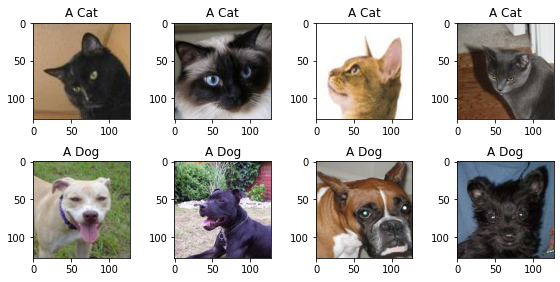

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

f, axs = plt.subplots(2, 4, figsize = (8, 4))
for i in range(4):
    img = np.random.choice(cats)
    ax = axs[0, i]
    ax.set_title("A Cat")
    ax.imshow(Image.open(img))
for i in range(4):
    img = np.random.choice(dogs)
    ax = axs[1, i]
    ax.set_title("A Dog")
    ax.imshow(Image.open(img))
plt.tight_layout()

## Getting started with pytorch

The following part provides a brief introduction to the fundamentals of `pytorch`.

### Why pytorch?

As most other popular deep learning frameworks, `pytorch` provides the following features:

- automatic differentiation,
- GPU support,
- flexible composition of neural network models,
- numerous pre-defined network components and optimization methods.

Pytorch strikes a good balance between flexibility, usability and performance, making it well suited for an introductory exercise as this one. There of course exist quite a few alternative frameworks, but the general concepts that you will learn in this exercise will apply also for them.

### Accessing documentation

Note that you can access source code documentation from inside the jupyter notebook using `?` and the `help` function. Documentation of the different torch modules can be found on the [pytorch home page](https://pytorch.org/docs/stable/index.html). 

In [3]:
import torch
help(torch.tensor)

Help on built-in function tensor:

tensor(...)
    tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Constructs a tensor with :attr:`data`.
    
    .. warning::
    
        :func:`torch.tensor` always copies :attr:`data`. If you have a Tensor
        ``data`` and want to avoid a copy, use :func:`torch.Tensor.requires_grad_`
        or :func:`torch.Tensor.detach`.
        If you have a NumPy ``ndarray`` and want to avoid a copy, use
        :func:`torch.as_tensor`.
    
    .. warning::
    
        When data is a tensor `x`, :func:`torch.tensor` reads out 'the data' from whatever it is passed,
        and constructs a leaf variable. Therefore ``torch.tensor(x)`` is equivalent to ``x.clone().detach()``
        and ``torch.tensor(x, requires_grad=True)`` is equivalent to ``x.clone().detach().requires_grad_(True)``.
        The equivalents using ``clone()`` and ``detach()`` are recommended.
    
    Args:
        data (array_like): Initia

##### Tensors

Tensors are a fundamental concept of `pytorch`, as well as most other deep learning frameworks. A tensor  designates a collection of elements that are organized on a multi-dimensional grid. You may think of them as a generalization of vectors or matrices: The elements in a vector are organized along 1 dimension, whereas in a matrix they are organized along 2 dimensions.

A typical application of tensors is to hold images. As an example, we can load an image of a dog into a `torch.tensor`:

In [4]:
from torchvision.transforms.functional import to_tensor, to_pil_image
image_name = np.random.choice(dogs)
dog = to_tensor(Image.open(image_name))
print("The size of 'dog' is:", dog.size())
dog

The size of 'dog' is: torch.Size([3, 128, 128])


tensor([[[0.6627, 0.6627, 0.6588,  ..., 0.6980, 0.6980, 0.6980],
         [0.6471, 0.6471, 0.6510,  ..., 0.7020, 0.7059, 0.7020],
         [0.6510, 0.6549, 0.6588,  ..., 0.7216, 0.7255, 0.7255],
         ...,
         [0.9412, 0.9412, 0.9333,  ..., 0.9529, 0.9451, 0.9333],
         [0.9294, 0.9294, 0.9333,  ..., 0.9059, 0.8392, 0.8000],
         [0.9255, 0.9294, 0.9255,  ..., 0.8078, 0.6902, 0.6157]],

        [[0.6157, 0.6157, 0.6118,  ..., 0.6235, 0.6235, 0.6235],
         [0.6000, 0.6000, 0.6039,  ..., 0.6157, 0.6196, 0.6157],
         [0.6039, 0.6078, 0.6118,  ..., 0.6353, 0.6392, 0.6392],
         ...,
         [0.7412, 0.7373, 0.7412,  ..., 0.7725, 0.7765, 0.7686],
         [0.7529, 0.7490, 0.7529,  ..., 0.7373, 0.6863, 0.6471],
         [0.7569, 0.7608, 0.7647,  ..., 0.6431, 0.5451, 0.4706]],

        [[0.5529, 0.5529, 0.5490,  ..., 0.5686, 0.5686, 0.5686],
         [0.5373, 0.5373, 0.5412,  ..., 0.5647, 0.5686, 0.5647],
         [0.5412, 0.5451, 0.5490,  ..., 0.5843, 0.5882, 0.

It becomes interesting when we start applying mathematical operations to tensors. For example we can compute the average of a cat and a dog. Note that all common mathematical operators (`+`, `-` `*`, `**`, ...) are defined on tensors.

Text(0.5, 1.0, 'A cat/dog average')

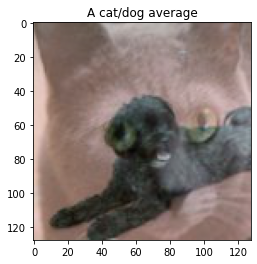

In [5]:
image_name = np.random.choice(cats)
cat = to_tensor(Image.open(image_name))
plt.imshow(to_pil_image(0.5 * (cat + dog)))
plt.title("A cat/dog average")

### Common tensor operations

There are many operations available on tensors and most of them follow the names used in `numpy`. In general, you can expect there to be an operation for most tasks at hand, so make sure you check the `pytorch` documentation search engine before you start cooking up something on your own.

#### Creation

In [6]:
import torch
ones = torch.ones(10, 10)
zeros = torch.zeros(10, 10)
rand = torch.randn(10, 10)

#### Mathematical operations

In [7]:
rand1 = torch.add(ones, rand)
p = torch.sigmoid(rand)
exp = torch.exp(rand)

#### Type conversions

As with `numpy.ndarray`s, the elements in a `torch.tensor` can have different data types. You can convert between different data types using the `to` member function.


In [8]:
print("The data type of p:", p.dtype)
p_short = p.to(torch.short)
print("The data type of p_short:", p_short.dtype)

The data type of p: torch.float32
The data type of p_short: torch.int16


For ML tasks you typically want to use [single-precision floating point numbers](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) (`torch.float32`). In general you will not have to worry too much about the data type, however, older versions of `pytorch` will throw errors when operations are performed on tensors with different numeric types.

In [9]:
p + p_short # Fails on older version of pytorch.

tensor([[0.5687, 0.7103, 0.4151, 0.3634, 0.1622, 0.7381, 0.5718, 0.7505, 0.4627,
         0.2623],
        [0.7027, 0.5566, 0.3614, 0.7519, 0.5433, 0.6307, 0.6717, 0.0803, 0.7315,
         0.5258],
        [0.5789, 0.5985, 0.9432, 0.2483, 0.2967, 0.8517, 0.5850, 0.2538, 0.3016,
         0.5288],
        [0.6013, 0.0824, 0.4656, 0.6338, 0.2656, 0.4610, 0.7460, 0.3933, 0.3493,
         0.5827],
        [0.0384, 0.1118, 0.5916, 0.4402, 0.3599, 0.5909, 0.5675, 0.7902, 0.5370,
         0.1781],
        [0.4819, 0.7576, 0.4379, 0.4326, 0.6873, 0.6336, 0.6468, 0.3260, 0.3145,
         0.2782],
        [0.3884, 0.2938, 0.2923, 0.2851, 0.4196, 0.8722, 0.2440, 0.8498, 0.7171,
         0.7834],
        [0.7016, 0.5597, 0.9438, 0.4324, 0.3530, 0.7735, 0.7041, 0.2449, 0.5408,
         0.5933],
        [0.5552, 0.8933, 0.5778, 0.3751, 0.4829, 0.6637, 0.4632, 0.7657, 0.6572,
         0.4980],
        [0.7187, 0.5871, 0.5211, 0.4538, 0.1857, 0.2694, 0.1994, 0.7957, 0.1715,
         0.1642]])

In [10]:
p2 = p + p_short.float() # short for p_short.to(torch.float32)

#### Conversion from and to numpy arrays

numpy arrays can be converted directly to pytorch tensors using the `torch.tensor` function.

Converting `pytorch` tensors to numpy arrays can be done using the `numpy()` member function. If `pytorch` tracks the gradient of a tensor, then you will also need to call the `detach()` member function.

In [11]:
t_numpy = np.random.rand(2, 2)
t = torch.tensor(t_numpy)
print("Type of t:", type(t_numpy))
print("Type of t_pytorch:", type(t))
print("Type of t_pytorch.numpy():", type(t.numpy()))

Type of t: <class 'numpy.ndarray'>
Type of t_pytorch: <class 'torch.Tensor'>
Type of t_pytorch.numpy(): <class 'numpy.ndarray'>


In [12]:
t.requires_grad = True
#t.numpy() # Doesn't work
t.detach().numpy() # Works

array([[0.80475813, 0.28875556],
       [0.88533994, 0.17619482]])

### Automatic differentiation

One of the core strengths of pytorch is that it let's you compute complex mathematical operations on tensors and compute their derivatives. Remember, that this is an important part of training neural networks: In order to minimize the loss function using gradient descent, it is of course required to first compute the gradients. Luckily, `pytorch`'s `autograd` module can take care of all the complicated calculations that are required to compute the gradients of neural networks.

Computing gradients w.r.t to a given tensor involves the following steps:
1. Create a tensor and set the `requires_grad` attribute to `True`,
2. apply mathematical operations,
3. call the `backward()` function of the result tensor to compute the gradients.

> *Note:* Step 1 is not required for parameters of networks, whose gradients are computed by default when the model is in training mode.

As an example, take the following operation:

In [13]:
x = torch.linspace(-4, 4, 101, requires_grad=True)
y = torch.sigmoid(x)
z = y.sum()
z.backward()
dzdx = x.grad

Text(0, 0.5, 'y')

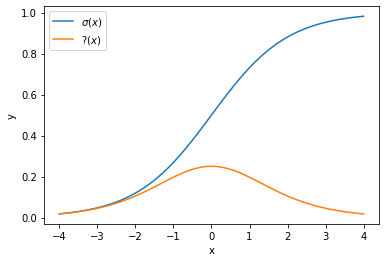

In [14]:
f, ax = plt.subplots(1, 1)
ax.plot(x.detach().numpy(),
        y.detach().numpy(),
        label = "$\sigma(x)$")
ax.plot(x.detach().numpy(),
        dzdx.numpy(),
        label = "$?(x)$")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

## [Exercise 1: Derivatives of activation functions, 0.5 point] 

Write down analytical expressions for the function $\sigma(x)$ and $?$ shown above.

#### Your answer here:
$\sigma(x) = \frac{1}{1 + e^{-x}}$  

$?(x) = \frac{d\sigma(x)}{dx} = 
\frac{0 * (1 + e^{-x}) - 1 * (0 - e^{-x})}{(1 + e^{-x})^2} =  
\frac{e^{-x}}{(1 + e^{-x})^2} = 
\frac{e^{-x}}{(1 + e^{-x})(1 + e^{-x})} = 
\frac{1}{1 + e^{-x}} * \frac{e^{-x}}{1 + e^{-x}} =
\sigma(x) * \frac{e^{-x}}{1 + e^{-x}} = 
\sigma(x) * \frac{(1 + e^{-x}) - 1}{1 + e^{-x}} = \\
\sigma(x) * (1 - \frac{1}{1 + e^{-x}}) = 
\sigma(x) * (1 - \sigma(x))$

### GPU acceleration

Training complex networks is a computationally demanding task. To shorten training times, caluclations are typically performed on specialized hardware that was traditionally used to render 3D graphics on computers, so called graphic processing units (GPUs) or graphic cards. GPUs are in general more efficient in performing  highly-parallel computational tasks than CPUs, which are the chips that perform all 'standard' calculations in a PC. In `pytorch`, all oprations on tensors can be performed on a GPU using NVIDIA's CUDA computing platforms (https://en.wikipedia.org/wiki/CUDA).

The different processors that can be used for calculations, i.e. CPU or GPU, are represented in `pytorch` as devices. Each tensor has an associated device on which its data is located.
The default device is represented by `torch.device("cpu")`. Hence by default, all calculations are executed on the CPU.  In order to be able to perform calculations on a tensor using a GPU, you need to move its data to the GPU's memory.


> **Note:** If you are using Google Colab, you may need to enable GPU hardware acceleration by `Go to Menu > Runtime > Change runtime` and change hardware acceleration to GPU.

In [15]:
# First check if CUDA is available.
print(torch.cuda.is_available())
cuda = torch.device("cuda")
cpu = torch.device("cpu")

True


Below, we will perform a quick demonstration of how much faster matrix multiplication becomes when executed on a  GPU.

In [16]:
W = torch.rand(512, 512)
def matmul_cpu():
    result = W
    for i in range(10):
        result = torch.matmul(W, result)
    return result
        
%time matmul_cpu()

CPU times: user 21.9 ms, sys: 3.99 ms, total: 25.9 ms
Wall time: 27.4 ms


tensor([[5.9134e+23, 5.7173e+23, 5.8225e+23,  ..., 5.8089e+23, 5.6327e+23,
         6.0312e+23],
        [6.1138e+23, 5.9112e+23, 6.0199e+23,  ..., 6.0058e+23, 5.8237e+23,
         6.2357e+23],
        [6.1079e+23, 5.9054e+23, 6.0141e+23,  ..., 6.0000e+23, 5.8180e+23,
         6.2297e+23],
        ...,
        [6.1324e+23, 5.9291e+23, 6.0382e+23,  ..., 6.0240e+23, 5.8413e+23,
         6.2546e+23],
        [6.0418e+23, 5.8415e+23, 5.9490e+23,  ..., 5.9350e+23, 5.7550e+23,
         6.1622e+23],
        [6.2239e+23, 6.0176e+23, 6.1283e+23,  ..., 6.1139e+23, 5.9285e+23,
         6.3479e+23]])

In [17]:
W_cuda = W.to(cuda)

def matmul_gpu():
    result = W_cuda
    for i in range(10):
        result = torch.matmul(W_cuda, result)
    return result
        
matmul_gpu() # First time using GPU can incur some overhead.
%time matmul_gpu()

CPU times: user 134 µs, sys: 36 µs, total: 170 µs
Wall time: 175 µs


tensor([[5.9134e+23, 5.7173e+23, 5.8225e+23,  ..., 5.8089e+23, 5.6327e+23,
         6.0312e+23],
        [6.1138e+23, 5.9112e+23, 6.0199e+23,  ..., 6.0058e+23, 5.8237e+23,
         6.2357e+23],
        [6.1079e+23, 5.9054e+23, 6.0141e+23,  ..., 6.0000e+23, 5.8180e+23,
         6.2297e+23],
        ...,
        [6.1324e+23, 5.9291e+23, 6.0382e+23,  ..., 6.0240e+23, 5.8413e+23,
         6.2546e+23],
        [6.0418e+23, 5.8415e+23, 5.9490e+23,  ..., 5.9350e+23, 5.7550e+23,
         6.1622e+23],
        [6.2239e+23, 6.0176e+23, 6.1283e+23,  ..., 6.1139e+23, 5.9285e+23,
         6.3479e+23]], device='cuda:0')

The `%time` command displays CPU and Wall time for the execution of the two functions. The CPU time is split up in `user` time, which is the time spent executing only your code, and `sys` time, which is the time spent executing system kernel code required for example to load data from disk. Note that the CPU time is computed per core, so when your code runs on multiple cores the resulting CPU time is the sum of the time each core spends computing.

The wall time shows the total time that it took to execute the function. Since CPU time is calculated per core, the wall time can actually be lower than the CPU time for code that is executed on multiple CPUs in parallel.

To compare the absolute execution time for the two functions it is therefore most meaningful to compare the displayed wall times. As you should see from them, calculating the matrix power on the GPU is substantially faster than calculating it on the CPU.

## Loading the data

To train a network on the `catsndogs` dataset, we need to load the images into tensors. The `catsndogs.training` module has an attribute `folder`, which points to the root folder containing the training data. The root folder contains a `cat` and a `dog` folder which holds the images of cats and dogs, respectively.


Using the `torchvision.datasets.ImageFolder` class, data that is organized in a folder structure like this can be turned directly into a dataset for training ML algorithms. The dataset provides access to the images as input and as an integer representations of the class labels as output.

In [18]:
from catsndogs.training import folder
from torchvision.datasets import ImageFolder

images = ImageFolder(folder)

You can load a sample from the training data by indexing the `images` object, which will return a tuple `(image, label)` containing the loaded image and corresponding label, which is 0 for cat and 1 for dog.

The type of image is: <class 'PIL.Image.Image'>
The label is: 0


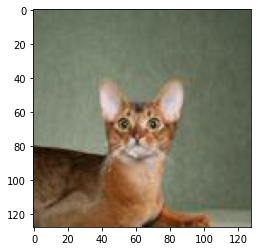

In [19]:
image, label = images[0]
plt.imshow(image)
print("The type of image is:", type(image))
print("The label is:", label)

However, as the code above shows, the type of the loaded image is a `PIL` image and not a tensor. To automatically transform the loaded image into a tensor, you can make use of the `transformation` parameter of the `ImageFolder` class.

The cell below adds a composition of two transforms to the dataset. The two transforms are applied sequentially to the image object that would otherwise be returned from the dataset. The first transform turns the image into a torch tensor and the second transform normalizes the image values so that they lie in the range $[-1, 1]$.

> Note: Input data that is not centered around zero can cause convergence problems during training, so it is usually a good idea to normalize input data to a range centered around 0.

In [20]:
from torchvision.transforms import Compose, ToTensor, Normalize

transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
images = ImageFolder(folder, transform=transform)
image, label = images[0]
print("Type of image is now:", type(image))

Type of image is now: <class 'torch.Tensor'>


In [21]:
# This function inverts the transformation of the input images.
def to_image(tensor):
    tensor = 0.5 * (tensor + 1.0)
    return to_pil_image(tensor)

For the training, we further split the data into training and validation set:

In [22]:
n_train = int(0.9 * len(images))
n_val = len(images) - n_train
training_data_catsndogs, validation_data_catsndogs = torch.utils.data.random_split(images, (n_train, n_val))

## [Exercise 2: Training a fully-connected network, 5.5 points]
## Defining a neural network model

Neural networks in `pytorch` are represented using the [`torch.nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) class. The typical way to define a neural network model is to define a new class that inherits from the `Module` class.

### 2, a) (1 points)

Inspect the code given below and, using the documentation of the [`torch.nn`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) module, answer the following questions:
- What is the architecture of instances of the `FullyConnected` class?
- What activations functions are applied in the hidden layers?
- What activation function is used for the output?
- How are the parameters of the network initialized? Why is this important to know?

In [23]:
from torch import nn

class FullyConnected(nn.Module):
    """
    Usually, this docstring should contain useful information about this
    class but this would make the exercise too easy.
    """
    def __init__(self,
                 input_features,
                 width):
        """
        Create a new mysterious network.
        """
        super().__init__()
        self.input_features = input_features
        self.fc_1 = nn.Linear(input_features, width)
        self.fc_2 = nn.Linear(width, width)
        self.fc_3 = nn.Linear(width, width)
        self.fc_4 = nn.Linear(width, 1)
        
    def forward(self, x):
        """
        The forward method required by nn.Module base class.
        """
        x = x.flatten(1, -1)
        x = self.fc_1(x)
        x = torch.relu(x)
        x = self.fc_2(x)
        x = torch.relu(x)
        x = self.fc_3(x)
        x = torch.relu(x)
        x = self.fc_4(x)
        return x
    

#### Your answer here:
1. Architecture is as follows: input layer having *input_features* as the shape (may be an image which will be flattened during training) followed by 3 hidden layes having *width* number of neurons and lastly an output layer having a single neuron.

2. *ReLU* activation function is applied at the hidden layers.

3. *No* activation function is used for the output.

4. Weights are initialized using **Kaiming Uniform method**. Bias is initialized using **LeCunn init**, i.e., $\text{uniform}(-s, s)$ where standard deviation $s = \frac{1}{\sqrt{\text{weight.size(1)}}}$. 

This is important to know in order to avoid the aforementioned gradient vanishing and gradient explosion problems

## The training loop

In the cell below you find code for a typical training loop in `pytorch`. 

### 2, b) (1 point)

Look at the function below and answer the following questions: 

- Most of the actual training functionality is abstracted away in the arguments provided to the function. For each of the arguments, describe what tasks the corresponding object has to perform so that this method can be used to train a neural network.
- What functions do the calls `model.train()` and `model.eval()` have? Why are these calls important?

In [24]:
def train_epoch(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """
    Again, this should be a useful docstring, but that would
    give away the answer for the exercise.
    """
    
    model.train()
    model.to(device)
    
    training_loss = 0.0
    n = len(training_loader)
    
    for i, (x, y) in enumerate(training_loader):
        
        # Set gradients to zero.
        optimizer.zero_grad()
        
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        x = x.view(-1, 128*128*3)
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        y = y.unsqueeze(1)
        l = loss(y_pred, y.float())
        l.backward()
        optimizer.step()
        
        training_loss += l.item()
        print('Batch ({} / {}): Training Loss {:.2f}'.format(i, n, l.item()))
        
    training_loss /= n
        
    model.eval()
    validation_loss = 0.0
    n = len(validation_loader)
    
    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y)
        
        validation_loss += l.item()
        print('Batch ({} / {}): Validation Loss {:.2f}'.format(i, n, l.item()))

    validation_loss /= n
    
    model.to(torch.device("cpu"))
    
    return (training_loss, validation_loss)

#### Your answer here:
#### Your answer here:

1. `training_loader`: contains the dataset input and actual output (x and y) required for training
   <br> `validation_loader`: contains the dataset input and actual output (x and y) required for validation
<br> `model`: type of nn model used for training (FC, RNN, CNN, etc)
<br> `loss`: Loss or the cost function used to evaluate loss during training (like Cross entropy loss, MSELoss, etc)
<br> `optimizer`: optimization algorithms that is used for training such as SGD+momentum, RMSProp, Adam, etc
<br> `device`: Cuda or CPU

2. In case of `model.train()` the model knows it has to learn the layers when we call it and when we use `model.eval()` it indicates the model that nothing new is to be learnt and the model is used for testing.

## The optimizer object

In the code above the optimization method was hidden in the `optimizer` object. To understand how to write a suitable optimizer, you first need to understand a bit more about the role of `Module` objects in `pytorch`. The `torch.nn.Module` class is the base class for all neural networks and the components that make up neural networks. Module objects typically have trainable parameters. These trainable parameters of a module can be accessed via its `parameters()` member function. When a module contains attributes that are themselves `Module` instances, then  the `parameters()` function of the containing module will automatically list the trainable parameters of its `Module` attributes.

In order to  train a network, the optimizer needs to be aware of the module's parameters. In `pytorch` an optimizer object therefore always needs to be instantiated with a list of parameters that should be trained. In addition to that, an optimizer typically provides a function to set the gradients of the module parameters to zero. This is because gradients in pytorch are accumulated between consecutive calls to the `backward()` function.
This makes it necessary to set the gradients to zero between to training iterations.

### 2, c)  (0.5 points)

Complete the code below so that the `step` method of the `SGD` class performs gradient descent on the provided list of parameters.

> **Hint 1:** The `parameters()` member function returns a list of tensors representing the weight matrices and bias vectors in a network. Given a tensor `p`, you can access its gradients using the `p.grad` attribute.

> **Hint 2:** Because of the way `pytorch`'s autograd function works, changing the  value of a parameter `p` has to be done using its `p.data` attribute:

```
p.data = ...
```

In [25]:
class GradientDescent():
    """
    A gradient descent optimizer.
    """
    def __init__(self,
                 parameters,
                 learning_rate):
        """
        Create a gradient descent optimizer.
        
        Arguments:
            parameters: Iterable providing the parameters to optimize.
            learning_rate: The learning rate to use for optimization.
        """
        self.parameters = list(parameters)
        self.learning_rate = learning_rate
        
    def zero_grad(self):
        for p in self.parameters:
            if not p.grad is None:
                p.grad.zero_()
        
    def step(self):
        """
        Perform a gradient descent step on parameters associated to this optimizer.
        """
        for p in self.parameters:
            p.data = p.data - self.learning_rate * p.grad

## Training the network

With the optimizer, the model and the training loop in place we are close to being able to start training the network, however a few details remain to be sorted out.

The `training_data_catsndogs` and `validation_data_catsndogs` object defined above can be used to iterate over the data, but only on a per sample basis. For the training of a neural network, however, we typically want to iterate through the data in batches. To take care of this, `pytorch` provides the `DataLoader` class, which can be used to batch and shuffle existing data:

In [26]:
from  torch.utils.data import DataLoader
training_loader_catsndogs = DataLoader(training_data_catsndogs, batch_size=32, shuffle=True)
validation_loader_catsndogs = DataLoader(validation_data_catsndogs, batch_size=32, shuffle=True)

Next, we need to choose a suitable training loss to minimize.

### 2, d) (0.5 points)

Choose a suitable loss function from the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module and assign an instance of it to the loss variable in the code cell below

> **Hint:** Note that in the `train_epoch` function defined above loss function is applied **directly** to the output of the network. In your choice of the loss function you thus need to consider the output activation of the network.

In [27]:
loss = nn.MSELoss()

Finally, we choose the device to run the training on. If available, you should use a GPU because it will be substantially faster.


In [28]:
if torch.cuda.is_available():
    device = torch.device('cuda') # Default CUDA device
else:
    device = torch.device('cpu')

### 2, e) (1 point)

Train the neural network for a least 10 epochs, then reduce the learning rate and continue training for at least another ten epochs. Plot the resulting training and validation losses, and answer the following question(s):

- Was the training successful? Explain why.  
- If the training was unsuccessful, give suggestion(s) on what can be done to make the training successful.


Batch (0 / 83): Training Loss 0.62
Batch (1 / 83): Training Loss 0.55
Batch (2 / 83): Training Loss 0.60
Batch (3 / 83): Training Loss 0.57
Batch (4 / 83): Training Loss 0.59
Batch (5 / 83): Training Loss 0.53
Batch (6 / 83): Training Loss 0.47
Batch (7 / 83): Training Loss 0.49
Batch (8 / 83): Training Loss 0.63
Batch (9 / 83): Training Loss 0.63
Batch (10 / 83): Training Loss 0.47
Batch (11 / 83): Training Loss 0.52
Batch (12 / 83): Training Loss 0.50
Batch (13 / 83): Training Loss 0.53
Batch (14 / 83): Training Loss 0.49
Batch (15 / 83): Training Loss 0.62
Batch (16 / 83): Training Loss 0.48
Batch (17 / 83): Training Loss 0.41
Batch (18 / 83): Training Loss 0.57
Batch (19 / 83): Training Loss 0.46
Batch (20 / 83): Training Loss 0.48
Batch (21 / 83): Training Loss 0.54
Batch (22 / 83): Training Loss 0.56
Batch (23 / 83): Training Loss 0.47
Batch (24 / 83): Training Loss 0.55
Batch (25 / 83): Training Loss 0.60
Batch (26 / 83): Training Loss 0.53
Batch (27 / 83): Training Loss 0.48
Ba

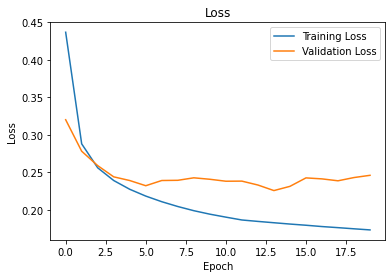

In [29]:
fc = FullyConnected(128*128*3,150)
learning_rate = 0.001
tr_loss = []
val_loss = []
for epoch in range(20):
    optimizer = GradientDescent(fc.parameters(),learning_rate)
    t, v = train_epoch(training_loader_catsndogs,
                validation_loader_catsndogs,
                fc,
                loss,
                optimizer,
                device)
    if epoch==10:
        learning_rate /= 2
    print(epoch+1)
    tr_loss.append(t)
    val_loss.append(v)

plt.plot(tr_loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Your answer here:
The training was not successful since the validation loss did not improve, but rather, it got worse. 

To improve these results, one could for example: use dropout and/or early stopping, increasing the complexity of our model, etc

### 2, f) (1 point)

A useful performance metric for binary classification tasks  is the [receiver operating characteristic (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). Complete the code below and write a function that computes the true positive and false positive rate for varying values of the discrimination threshold $p \in [0, 1]$. Then, using the code below, plot the ROC. What is the significance of the black, dashed line?

In [30]:
def receiver_operating_characteristic(model,
                                      validation_loader,
                                      ps):
    """
    Computes receiver operating characteristic for given model and
    validation data.
    
    Arguments:
        model: The pytorch model to evaluate.
        validation_loader: torch DataLoader to use to iterate over validation data.
        ps: Iterable containing the values of the discrimination threshold in
           increasing order.
    Returns:
        (fpr, tpr): Tuple containing the false positive rates (fpr) and the true
            positive rates as numpy.ndarrays.
    """
    model.eval()
    
    device = torch.device(cpu)
    
    fpr = []
    tpr = []

    for threshold in ps:
        print(threshold)
        fp, tp, fn, tn = 0,0,0,0
        for i, (x, y) in enumerate(validation_loader):
            # Move input to device
            x = x.to(device)
            y_true = y.to(device).detach().numpy()
            
            # Predict output, compute loss, perform optimizer step.
            y_prob = model(x)

            y_pred = np.where(y_prob >= threshold, 1, 0)

            fp += np.sum((y_pred == 1) & (y_true == 0))
            tp += np.sum((y_pred == 1) & (y_true == 1))

            fn += np.sum((y_pred == 0) & (y_true == 1))
            tn += np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
        
    return np.array(fpr), np.array(tpr)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0


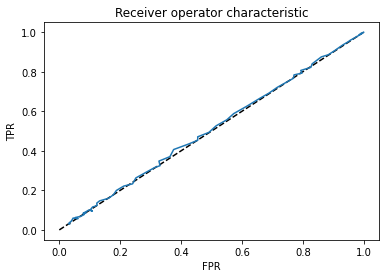

In [31]:
fpr, tpr = receiver_operating_characteristic(fc, validation_loader_catsndogs, np.linspace(0, 1, 101))

def plot_ROC(fpr,tpr):
    """
    Plots ROC curve

    Arguments:
        fpr: array-like containing false positive rates
        tpr: array-like containing true positive rates

    """
    x = np.linspace(0, 1, 101)
    f, ax = plt.subplots(1, 1)
    ax.plot(x, x, c="k", ls="--")
    ax.plot(fpr, tpr)
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title("Receiver operator characteristic")

plot_ROC(fpr,tpr)

#### Your answer here:
The black dashed line signifies the random selection of the label (50% chance of image being a dog or a cat)

### 2, g) (0.5 point)

One way to summarize the receiver operator characteristic (ROC) is to compute the area under the curve. This can be done using the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). Complete the code below and write a function for computing the area under the receiver operator characteristic curve (AUC ROC) using the trapezoidal rule. Then, calculate the area under the ROC-curve in exercise above 2, g) using this function.


In [32]:
def auc_roc(fpr, tpr):
    """
    Computes area under receiver operating characteristic cruve using the
    trapeziodal rule for given false positive and true positive rates.
    
    Arguments:
        fpr: False positive rates.
        tpr: True positive rates.
        
    Returns:
        auc_roc: Area under the receiver operating characteristic curve as
            float value
    """
    return np.sum(np.trapz(tpr,fpr))+1

print(auc_roc(fpr, tpr))

0.49389428552630343


Finally, let's look at the prediction for samples from the validation set. Is this what you expected? You do **not** need to write down an answer for this question, but you should always spend some time to reflect on your results.

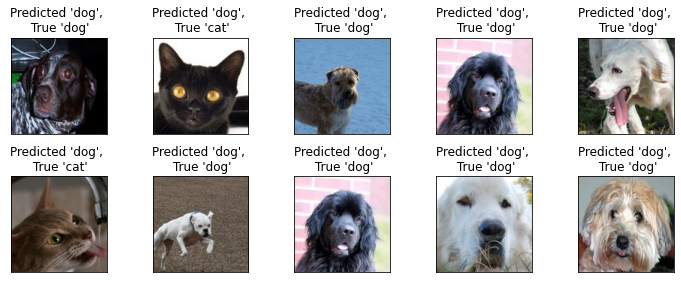

In [33]:
def index_to_pet(index):
    
    if index == 0:
        return "cat"
    else:
        return "dog"
    
def plot_results(model, validation_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):

        # Make prediction on random validation sample
        index = np.random.randint(len(validation_data))
        x, y = validation_data[index]
        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted '{}', \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()

plot_results(fc, validation_data_catsndogs)

## [Exercise 3: Training a convolutional  neural network, 4 points]

### 3, a) (2 points)

Define and train a convolutional network with the following architecture:
- 2D conv. layer: $32$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $4 \times 4$, stride 4
- 2D conv. layer: $64$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- 2D conv. layer: $128$ filters, kernel size $3 \times 3$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- Fully connected: 512 neurons
- ReLU activation function
- Fully connected: 512 neurons
    

> **Hint:** You can find all necessary components to implement the convolutional network in the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module.

In [34]:
class Cnn(nn.Module):
    def __init__(self,drop,add=False):
        super(Cnn,self).__init__()
        self.drop = drop
        self.add = add

        self.layer1 = nn.Sequential(
            nn.Conv2d(3,32,kernel_size=5, padding=0,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(4, stride=4)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=5, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64,128, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        
        self.fc1 = nn.Linear(5*5*128,512)
        self.dropout = nn.Dropout(0.6)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512,512)
        if self.add:
            self.fc3 = nn.Linear(512,512)
            self.fc4 = nn.Linear(512,1)
        else:
            self.fc3 = nn.Linear(512,1)
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        if self.drop:
            out = self.dropout(out)
        out = self.relu(self.fc2(out))
        if self.drop:
            out = self.dropout(out)
        if self.add:
            out = self.relu(self.fc3(out))
            out = self.fc4(out)
        else:
            out = self.fc3(out)
        return out

In [35]:
def train_epoch_cnn(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """
    Again, this should be a useful docstring, but that would
    give away the answer for the exercise.
    """
    device = torch.device(cuda) if torch.cuda.is_available() else torch.device(cpu)
    model.train()
    model.to(device)
    
    training_loss = 0.0
    n = len(training_loader)
    
    for i, (x, y) in enumerate(training_loader):
        
        # Set gradients to zero.
        optimizer.zero_grad()
        
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        #x = x.view(-1, 128*128*3)
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        y = y.unsqueeze(1)
        l = loss(y_pred, y.float())
        l.backward()
        optimizer.step()
        
        training_loss += l.item()
        print('Batch ({} / {}): Training Loss {:.2f}'.format(i, n, l.item()))
        
    training_loss /= n
        
    model.eval()
    validation_loss = 0.0
    n = len(validation_loader)
    
    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y)
        
        validation_loss += l.item()
        print('Batch ({} / {}): Validation Loss {:.2f}'.format(i, n, l.item()))

    validation_loss /= n
    
    model.to(torch.device("cpu"))
    
    return (training_loss, validation_loss)

In [36]:
model = Cnn(drop = False)
learning_rate = 0.08
loss = nn.MSELoss()
for epoch in range(20):
    optimizer = GradientDescent(model.parameters(),learning_rate)
    train_epoch_cnn(training_loader_catsndogs,
                validation_loader_catsndogs,
                model,
                loss,
                optimizer,
                device)
    if epoch==10:
        learning_rate /= 2
    print(epoch+1)

Batch (0 / 83): Training Loss 0.71
Batch (1 / 83): Training Loss 0.46
Batch (2 / 83): Training Loss 0.27
Batch (3 / 83): Training Loss 0.27
Batch (4 / 83): Training Loss 0.23
Batch (5 / 83): Training Loss 0.24
Batch (6 / 83): Training Loss 0.21
Batch (7 / 83): Training Loss 0.20
Batch (8 / 83): Training Loss 0.18
Batch (9 / 83): Training Loss 0.24
Batch (10 / 83): Training Loss 0.22
Batch (11 / 83): Training Loss 0.24
Batch (12 / 83): Training Loss 0.20
Batch (13 / 83): Training Loss 0.24
Batch (14 / 83): Training Loss 0.25
Batch (15 / 83): Training Loss 0.24
Batch (16 / 83): Training Loss 0.23
Batch (17 / 83): Training Loss 0.18
Batch (18 / 83): Training Loss 0.23
Batch (19 / 83): Training Loss 0.21
Batch (20 / 83): Training Loss 0.23
Batch (21 / 83): Training Loss 0.22
Batch (22 / 83): Training Loss 0.18
Batch (23 / 83): Training Loss 0.24
Batch (24 / 83): Training Loss 0.22
Batch (25 / 83): Training Loss 0.23
Batch (26 / 83): Training Loss 0.20
Batch (27 / 83): Training Loss 0.19
Ba

### 3, b)  (2 points)

Tune the network architecture and training routine to achieve a validation error lower than 0.2. Some things you may want to try: 
- Increasing the complexity of your network (more layers, filters or neurons)
- A learning rate schedule
- Checkpoints or early stopping
- Data augmentation to increase the number of training points
- Dropout
- Other regularization techniques

In [37]:
class GradientDescentcnn():
    """
    A gradient descent optimizer.
    """
    def __init__(self,
                 parameters,
                 learning_rate,lam):
        """
        Create a gradient descent optimizer.
        
        Arguments:
            parameters: Iterable providing the parameters to optimize.
            learning_rate: The learning rate to use for optimization.
        """
        self.parameters = list(parameters)
        self.learning_rate = learning_rate
        
    def zero_grad(self):
        for p in self.parameters:
            if not p.grad is None:
                p.grad.zero_()
        
    def step(self):
        """
        Perform a gradient descent step on parameters associated to this optimizer.
        """
        for p in self.parameters:
            p.data = p.data - self.learning_rate * (p.grad + lam*p.data)

In [38]:
device = torch.device(cuda) if torch.cuda.is_available() else torch.device(cpu)
model = Cnn(drop=True, add=True)
learning_rate, lam = 9e-3, 9e-3
loss = nn.MSELoss()
for epoch in range(20):
    optimizer = GradientDescentcnn(model.parameters(),learning_rate,lam)
    train_epoch_cnn(training_loader_catsndogs,
                validation_loader_catsndogs,
                model,
                loss,
                optimizer,
                device)
    if epoch%7==0:
        learning_rate /= 1.5
    print(epoch+1)

Batch (0 / 83): Training Loss 0.76
Batch (1 / 83): Training Loss 0.66
Batch (2 / 83): Training Loss 0.68
Batch (3 / 83): Training Loss 0.54
Batch (4 / 83): Training Loss 0.49
Batch (5 / 83): Training Loss 0.51
Batch (6 / 83): Training Loss 0.45
Batch (7 / 83): Training Loss 0.48
Batch (8 / 83): Training Loss 0.57
Batch (9 / 83): Training Loss 0.59
Batch (10 / 83): Training Loss 0.57
Batch (11 / 83): Training Loss 0.46
Batch (12 / 83): Training Loss 0.51
Batch (13 / 83): Training Loss 0.46
Batch (14 / 83): Training Loss 0.45
Batch (15 / 83): Training Loss 0.47
Batch (16 / 83): Training Loss 0.41
Batch (17 / 83): Training Loss 0.39
Batch (18 / 83): Training Loss 0.40
Batch (19 / 83): Training Loss 0.42
Batch (20 / 83): Training Loss 0.32
Batch (21 / 83): Training Loss 0.37
Batch (22 / 83): Training Loss 0.40
Batch (23 / 83): Training Loss 0.37
Batch (24 / 83): Training Loss 0.37
Batch (25 / 83): Training Loss 0.31
Batch (26 / 83): Training Loss 0.31
Batch (27 / 83): Training Loss 0.31
Ba

## [Exercise 4: Evaluation on test set, 1 points]

Now evaluate the performance of the fully-connected neural network to your best convolutional neural network on the `catsndogs` test data, which is available in `catsndogs.test` module.

- Plot ROC curves and compute AUC ROC for both the fully-connected and the convolutional model.
- Compute the accuracy of each model for a discimination threshold p = 0.5
- Provide a plot, for each model, of 8 images from the test set together with the prediction from the model.

In [39]:
from catsndogs.test import folder

test = ImageFolder(folder, transform=transform)
test_loader_catsndogs = DataLoader(test, batch_size=32, shuffle=True)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
0.49918925772167566


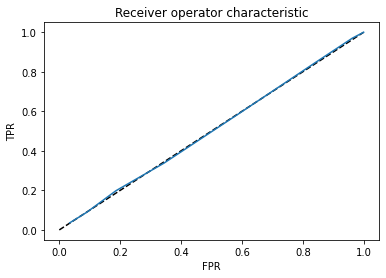

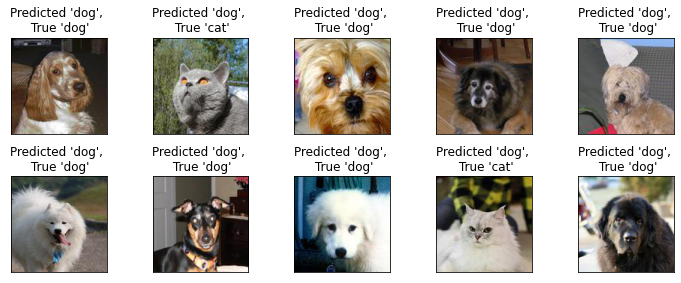

In [40]:
device = torch.device('cpu')
fpr, tpr = receiver_operating_characteristic(fc, test_loader_catsndogs, np.linspace(0, 1, 11))
plot_ROC(fpr,tpr)
print(auc_roc(fpr, tpr))
plot_results(fc, test)

In [ ]:
# For CNN
device = torch.device('cpu')
fpr, tpr = receiver_operating_characteristic(model, test_loader_catsndogs, np.linspace(0, 1, 11))
plot_ROC(fpr,tpr)
print(auc_roc(fpr, tpr))
plot_results(model, test)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


# Time series prediction

In this practical part of the assignment you will use RNNs to predict the amount of water flowing in a stream or river, the so-called *streamflow*, from meteorological data.


## The data

The data that you will be using for the training comes from a scientific dataset named *Catchment Attributes and Meteorology for Large-sample Studies* (CAMELS). It is described in detail in the following paper:

A. Newman; K. Sampson; M. P. Clark; A. Bock; R. J. Viger; D. Blodgett, 2014. A large-sample watershed-scale hydrometeorological dataset for the contiguous USA. Boulder, CO: UCAR/NCAR. https://dx.doi.org/10.5065/D6MW2F4D

The dataset contains time series of streamflow combined with the most important *meteorological forcings* for the given river or stream. The forcing values describe the most important meteorological processes that determine the streamflow. The princpial forcing is of course precipitation, i.e. rain and snow, but also the temperature and strength of solar can indirectly influence the streamflow. These forcings have been aggregated over the drainage basin, which is the area upstream of the gauge measuring the streamflow in which precipitation will drain off into the river whose streamflow is being measured.

A model that predicts the strength of the flow in a river from meteorological inputs is called a run-off model.  Important applications of run-off models are predicting floods or analysing the impact of climate change on the stream and its surroundings.

In this exercise you will use the streamflow dataset to develop your own run-off model. For this you will use data from a single gauge, identified by the ID `13331500`. The plot below displays the location of the gauge:

In [ ]:
import pandas as pd
import camels

gauge_id = 13331500
camels.plot_basin(gauge_id)

The `camels` package provides a Python interface for the streamflow data. Using the `camels.pytorch.Streamflow` class you can access the time series data directly as `pytorch` tensors.

The available data spans the time range from 1980 to 2014. Of that, the first 26 years are used as training data, years 2006 to 2010  as validation data and years 2010 to 2014 as testing data. 

In [ ]:
from camels.pytorch import Streamflow
training_data_camels = Streamflow(gauge_id, "training")
validation_data_camels = Streamflow(gauge_id, "validation")

The plot below gives an overview over a period of three years from the training data. The first three panels show the six meteorological forcings that are the inputs for modeling the streamflow:
- length of the day
- strength of incoming solar radiation
- precipitation
- (water) vapor pressure, i.e. the amount of water vapor in the air
- daily minimum temperature
- daily maximum temperature

The lowest panel shows the measured streamflow.

In [ ]:
from datetime import datetime
start = datetime(2000, 1, 1, hour=0)
end = datetime(2003, 1, 1, hour=0)
training_data_camels.plot_overview(start, end)

## [Exercise 5] (1 point) 

Describe any patterns you see in the time series of forcings and streamflow shown above. Provide a simple description of the physical processes that relate the forcings (input) to the streamflow (output).

#### Your answer here:
The forcings approximately follows sinusoidal nature with the same frequency, i.e. there is some seasonal trend in the data. The streamflow also follows a seasonal pattern. Whenever the forcings are in their concave part, the streamflow follows the same concave part (with reduced width) and it is zero otherwise. We can equate this process with the charging and discharging of a battery (voltage output in the capacitor during charging and discharging which follows the same pattern).   


### Training and testing data

The `Streamflow` dataset provides sequences of a length of 400 days of meteorological forcings and corresponding streamflows as samples. The `data_loader` member function can be used to instantiate `pytorch` dataloaders with a given batch size.

> **Note 1:** Input and outputs in the dataset are all normalized to have mean 0 and standard deviation 1. For simplicity, we will from now on consider forcings and outputs in normalized units instead of the units given in the plot above.

> **Note 2:** Pytorch expects tensors of sequences to have the elements in the sequence along the first dimension and the batch elements along the second. A tensor containing a batch of 8 samples from the `Streamflow` data thus
has shape `(400, 8, 6)`.

In [ ]:
training_loader_camels = training_data_camels.data_loader(batch_size=8)

## [Exercise 6] (2 points)

### 6, a) (1 point)

Write a custom `torch.nn.Module` subclass that implements the basic RNN from theoretical exercise 5 **without using the predefined `nn.RNN` class provided by `pytorch`**. Include the bias terms for the mappings from input to hidden state, hidden state to hidden state, and hidden state to output. This means
that for step $t$, the hidden state $h_t$ and output $\hat{y}_t$ should be given by:

\begin{align}
  h_t &= \tanh( \mathbf{W}_{xh}\ x_t + \theta_{xh} + \mathbf{W}_{hh} \ h_{t - 1} + \theta_{hh}) \\
  \hat{y}_t &= \mathbf{W}_{hy}\ h_t + \theta_y
\end{align}

Make the size of the hidden state a parameter of the class constructor.


> **Hint 1:** You can use `torch.nn.Linear` layers to implement the linear mappings between input, hidden state, and output.

In [ ]:
class RNNBasic(nn.Module):
    
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(RNNBasic, self).__init__()
        
        self.Wxh = nn.Parameter(torch.randn(hiddenSize, inputSize)) # input weights
        self.Whh = nn.Parameter(torch.randn(hiddenSize, hiddenSize)) # hidden weights
        self.Why = nn.Parameter(torch.randn(outputSize, hiddenSize)) # output weights
        self.bxh = nn.Parameter(torch.randn(hiddenSize,1)) # hidden state bias-1
        self.bhh = nn.Parameter(torch.randn(hiddenSize,1)) # hidden state bias-2
        self.by = nn.Parameter(torch.randn(outputSize,1)) # output bias
        
    def forward(self, X, h):
        output = []
        # for each time step
        seq,btsz,feature = X.size()[0],X.size()[1],X.size()[2]
        count = 1
        for z in X:
            x = z.view(feature,btsz)
            h = torch.tanh(torch.matmul(self.Wxh, x) + self.bxh + torch.matmul(self.Whh,h) + self.bhh)
            yo = torch.matmul(self.Why,h) + self.by
            output.append(yo.view(-1)) 
            count += 1
        return np.array(output), h

### 6, b) (1 point)

Train an instance of your RNN model class using mean squared error (MSE) loss on the streamflow training data. For the hidden state, a size around $64$ is a suitable first choice.

Monitor the validation loss by computing the MSE for a single predicted sequence of streamflows for the full validation time range. You can obtain the input and output tensors corresponding to the full validation range by calling the `get_range` member function of `validation_data_camels`:

```
x,y = validation_data_camels.get_range()
```

Plot training and validation losses.

> **Hint 1:** To train your RNN you are free to use all available `pytorch` functionality. Particularly the [`torch.optim`](https://pytorch.org/docs/stable/optim.html) module can be of interest.

> **Hint 2:** As baseline, training using the `Adam` optimizer with a learning rate of $10^{-3}$ for 40 epochs should give a significant reduction in training loss. The reduction in the validation will likely be much smaller.


In [ ]:
#hyperparameters
inputSize, hiddenSize, outputSize = 6,10,1
learningRate = 1e-3
epochs = 40

In [ ]:
device = torch.device('cuda')
# create our network instance, pick loss function and optimizer
model = RNNBasic(inputSize, hiddenSize, outputSize)
lossFn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
model.train()
model = model.to(device)
lossHistory,vallossHistory = [],[]
for epoch in range(epochs):
    lossTotal = 0
    for x,y in training_loader_camels:
        x = x.to(device)
        y = y.to(device)
        h = torch.randn(hiddenSize,1) # initial hidden state
        h = h.to(device)
        yhat,h = model(x,h)
        l = 0
        for i in range(len(yhat)):
            l += lossFn(yhat[i].view(-1),y[i].view(-1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        lossTotal += l.item()/(len(yhat)*8)
    lossHistory.append(lossTotal)
    x,y = validation_data_camels.get_range()
    x = x.to(device)
    y = y.to(device)
    h = torch.randn(hiddenSize,1) # initial hidden state
    h = h.to(device)
    yhat,h = model(x,h)
    l = 0
    for i in range(len(yhat)):
        l += lossFn(yhat[i].view(-1),y[i].view(-1))
    vallossTotal = l.item()/(len(yhat))
    vallossHistory.append(vallossTotal)
    print('Epoch:',str(epoch+1)+'/'+str(epochs),'Training Loss:',lossTotal,'Validation Loss:',vallossTotal)


plt.plot(lossHistory,label='Training Loss')
plt.plot(vallossHistory,label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()